In [1]:
# install dependencies
from config import API_KEY, API_KEY_Secret, Bearer_Token, Access_Token, Access_Token_Secret
import tweepy
from tweepy.parsers import JSONParser
import pandas as pd

In [2]:
# import api keys
consumer_key = API_KEY
consumer_secret = API_KEY_Secret
access_token = Access_Token
access_token_secret = Access_Token_Secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# set api
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
# search tweets using api with a keyword
search_tweets = api.search_tweets(q="halloween", lang = 'en', count=100)


In [3]:
search_tweets

{'statuses': [{'created_at': 'Wed Nov 03 20:27:47 +0000 2021',
   'id': 1455995142830268418,
   'id_str': '1455995142830268418',
   'text': "RT @gatobrujoart: Happy halloween!! I'm posting this comic again because I still liked how it end up.\nHawks halloween surprise for Dabi did…",
   'truncated': False,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'gatobrujoart',
      'name': 'GatoBrujo',
      'id': 879243927492100096,
      'id_str': '879243927492100096',
      'indices': [3, 16]}],
    'urls': []},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 1247529072520908801,
    'id_str': '1247529072520908801',
    'name': 'Rosalinda Moss',
    's

In [4]:
# read json data to a dataframe
twitter_api_df = pd.json_normalize(search_tweets["statuses"])
twitter_api_df

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,retweeted_status.place.id,retweeted_status.place.url,retweeted_status.place.place_type,retweeted_status.place.name,retweeted_status.place.full_name,retweeted_status.place.country_code,retweeted_status.place.country,retweeted_status.place.contained_within,retweeted_status.place.bounding_box.type,retweeted_status.place.bounding_box.coordinates
0,Wed Nov 03 20:27:47 +0000 2021,1455995142830268418,1455995142830268418,RT @gatobrujoart: Happy halloween!! I'm postin...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed Nov 03 20:27:47 +0000 2021,1455995141861302275,1455995141861302275,RT @MJJSpotify2015: A recap of everywhere #Mic...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wed Nov 03 20:27:47 +0000 2021,1455995141546811405,1455995141546811405,RT @MarshallJulius: Hauntingly Happy 75th Birt...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wed Nov 03 20:27:47 +0000 2021,1455995140292546563,1455995140292546563,RT @monosea27: Halloween SSS 🍅🌸🥗\n#サスサク https:...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wed Nov 03 20:27:46 +0000 2021,1455995138283646979,1455995138283646979,@PointPaul @hicetnunc2000 Halloween leftovers ...,False,"<a href=""http://twitter.com/download/android"" ...",1.455879e+18,1455879068386271236,3.347765e+09,3347764750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Wed Nov 03 20:27:20 +0000 2021,1455995029164593158,1455995029164593158,RT @SpaceXMR: I was Jeff Bezos’ rocket for Hal...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Wed Nov 03 20:27:20 +0000 2021,1455995027667181570,1455995027667181570,RT @_chinara_: Threw a meme party for #Hallowe...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,Wed Nov 03 20:27:20 +0000 2021,1455995026971009026,1455995026971009026,RT @KAlAGEBER: kaia gerber as jane birkin for ...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Wed Nov 03 20:27:20 +0000 2021,1455995026962530310,1455995026962530310,RT @Savetheanimal14: Happy Halloween 🎃 https:/...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# get only columns that will be used
filtered_df = twitter_api_df[["created_at", "text"]]
filtered_df

,created_at,text
0,Wed Nov 03 20:27:47 +0000 2021,RT @gatobrujoart: Happy halloween!! I'm postin...
1,Wed Nov 03 20:27:47 +0000 2021,RT @MJJSpotify2015: A recap of everywhere #Mic...
2,Wed Nov 03 20:27:47 +0000 2021,RT @MarshallJulius: Hauntingly Happy 75th Birt...
3,Wed Nov 03 20:27:47 +0000 2021,RT @monosea27: Halloween SSS 🍅🌸🥗\n#サスサク https:...
4,Wed Nov 03 20:27:46 +0000 2021,@PointPaul @hicetnunc2000 Halloween leftovers ...
...,...,...
90,Wed Nov 03 20:27:20 +0000 2021,RT @SpaceXMR: I was Jeff Bezos’ rocket for Hal...
91,Wed Nov 03 20:27:20 +0000 2021,RT @_chinara_: Threw a meme party for #Hallowe...
92,Wed Nov 03 20:27:20 +0000 2021,RT @KAlAGEBER: kaia gerber as jane birkin for ...
93,Wed Nov 03 20:27:20 +0000 2021,RT @Savetheanimal14: Happy Halloween 🎃 https:/...


In [6]:
# Convert tweets to list for cleaning
text_list = filtered_df["text"].tolist()
text_list

["RT @gatobrujoart: Happy halloween!! I'm posting this comic again because I still liked how it end up.\nHawks halloween surprise for Dabi did…",
 'RT @MJJSpotify2015: A recap of everywhere #MichaelJackson went #1 Halloween 2021\n\nITunes Pop Songs \nITunes Halloween Song\nITunes Halloween…',
 "RT @MarshallJulius: Hauntingly Happy 75th Birthday Wishes to the Godfather of Gore, @THETomSavini!\n“Halloween to me is like every day. It's…",
 'RT @monosea27: Halloween SSS 🍅🌸🥗\n#サスサク https://t.co/IawjN5HEcY',
 '@PointPaul @hicetnunc2000 Halloween leftovers 🎃\nhttps://t.co/f8D2w0kLXn',
 'Our winners for the 2021 Heifer Halloween contest get their prizes! Mr. Rennick received a Tilted Skillet gift card… https://t.co/3EedjzABgK',
 'RT @bootwtbrainrot: Could I have done this for Halloween? Yeah probably but I thought of the idea afterward \n\nDay 54/364\n#ranboofanart #bil…',
 '@AndreaWoo @christaylor_nyc Victoria also loves Halloween fireworks. My dogs do not.',
 'Halloween costume #1 for next y

In [7]:
# import cleaning function
from Final_Data_Cleaning import clean_tweets_func

# create function to make text df
def create_text_df():
    text = clean_tweets_func(text_list)
    text_df = pd.DataFrame({"tweet":text})
    return text_df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samanthavillanueva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# call create_text_df function for EDA
text_df = create_text_df()
text_df.head()

,tweet
0,"[happy, halloween, i'm, posting, comic, still,..."
1,"[recap, everywhere, michaeljackson, went, hall..."
2,"[hauntingly, happy, th, birthday, wish, godfat..."
3,"[halloween, ss]"
4,"[halloween, leftover]"


In [9]:
# save df as csv
text_df.to_csv('Resources/New_Tweets_API_Data.csv', index = False)

In [11]:
# load csv
new_tweets_df = pd.read_csv("Resources/New_Tweets_API_Data.csv")
new_tweets_df.head()

,tweet
0,"['happy', 'halloween', ""i'm"", 'posting', 'comi..."
1,"['recap', 'everywhere', 'michaeljackson', 'wen..."
2,"['hauntingly', 'happy', 'th', 'birthday', 'wis..."
3,"['halloween', 'ss']"
4,"['halloween', 'leftover']"


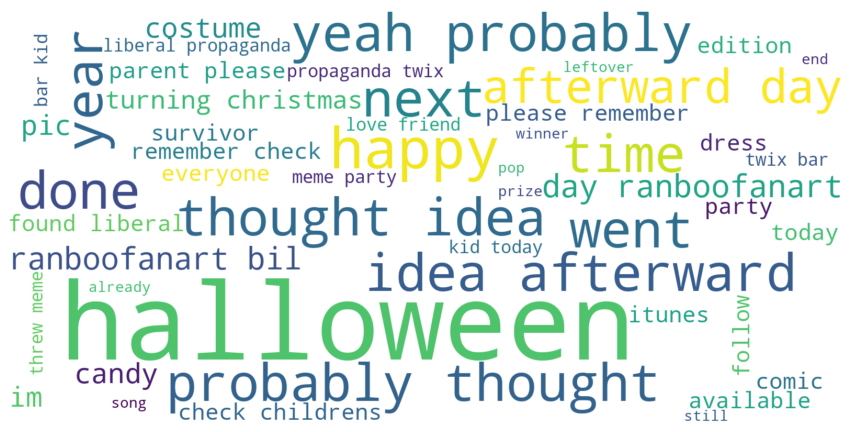

In [12]:
# 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
mask = np.array(Image.open("Resources/Twitter.png"))
wordcloud = WordCloud(background_color="white", max_words=50, width=1600, height=800).generate(''.join(new_tweets_df['tweet']).replace("'",""))
# create twitter image
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:

word_count={}
for row in text_df.tweet:
    for element in row:
        word = element.replace("'","")
        word_count[word]=word_count.get(word,0)+1

words = pd.DataFrame.from_dict(word_count.items())

In [ ]:
words.columns = words.columns.astype(str)
words=words.rename(columns={"0": "Word", "1": "Count"})
words.sort_values(by="Count", ascending=True).tail(50)

In [ ]:
words.dtypes

In [ ]:
words.loc[100]

In [ ]:
# top 10 words
import plotly.express as px
word_cloud = px.data.tips()
fig = px.bar(words.sort_values(by="Count", ascending=True).tail(10), x="Count", y="Word", orientation='h')
fig.show()